# Student Education Analysis

<img style="width:300px; float:left;" src="assets/galelio.jpeg"/>

<img style="width:300px; float:right;" src="assets/homelander_gm.jpeg"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Features
- school
- gender
- age
- address
- famsize
- Pstatus
- Medu
- Fedu
- Mjob
- Fjob
- reason
- guardian
- traveltime
- studytime
- failures
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic
- famrel
- freetime
- goout
- Dalc
- Walc
- health
- absences
- passed

In [2]:
df = pd.read_csv("student-data.csv")
features=list(df.keys())

In [3]:
features

['school',
 'gender',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'passed']

[]

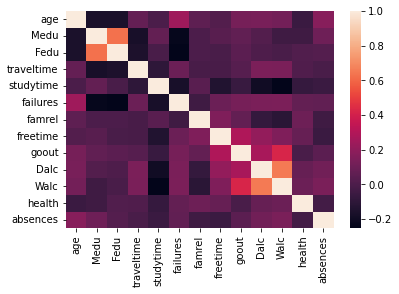

In [4]:
sns.heatmap(df.corr())
plt.plot()

## Students Examination obeservations
- By Analysing Graph below we can see
    - 67.1% of students passed the exams
    - 32.9% of students failed the exam

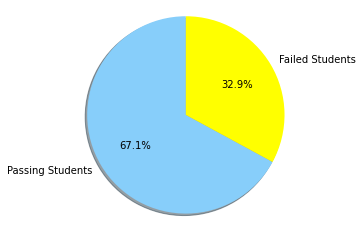

In [5]:
labels = 'Passing Students', 'Failed Students'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
df["goout"].unique()

array([4, 3, 2, 1, 5])

## Analysis of students Going out
- By graph below we can see that
    - Most of the students Go out for 3-3.5 hrs
    - On second place students go out for 2hrs

[]

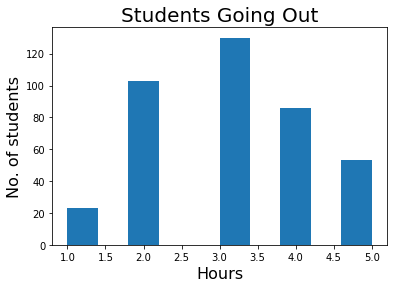

In [16]:
plt.hist(df["goout"])
plt.title('Students Going Out', fontsize=20)
plt.ylabel('No. of students', fontsize=16)
plt.xlabel('Hours', fontsize=16)
plt.plot()

## Gender Distribution of students
- Shockingly most of the students in this dataset are female

[]

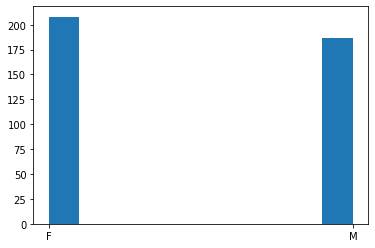

In [5]:
plt.hist(df["gender"])
plt.plot()

## Internet availablity
- As per graph Most of students have internet access

[]

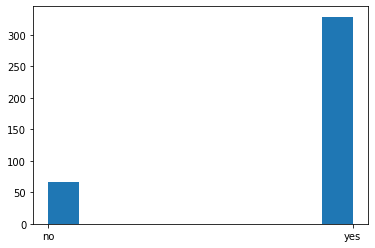

In [9]:
plt.hist(df["internet"])
plt.plot()

## Mother job
- Mother's of most of student work in other jobs
- Second place they work at services
- level of teacher and houswife are same

[]

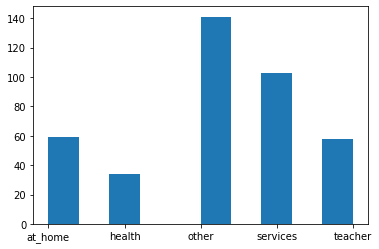

In [11]:
plt.hist(df["Mjob"])
plt.plot()

## Parents job father
- As per the graph you can observe
    - Most of Fathers have job in other category instead of major job fields
    - On second place fathers are in services

[]

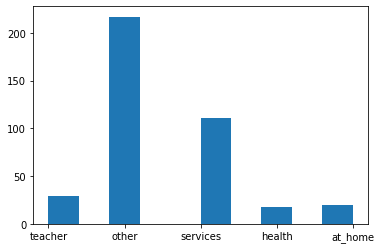

In [12]:
plt.hist(df["Fjob"])
plt.plot()

## Study time of students
- Most of the students self-study for only 2hrs
- Second place they study for 1 hr


[]

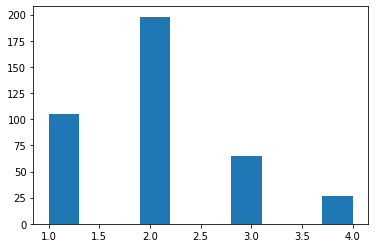

In [13]:
plt.hist(df["studytime"])
plt.plot()

Box plots are used to show overall patterns of response for a group. They provide a useful way to visualize the range and other characteristics of responses for a large group. The diagram below shows a variety of different box plot shapes and positions.
The range between q1 and q3 in the below graph is inter quartile range(IQR). 
The interquartile range (IQR) is the box plot showing the middle 50% of scores and can be calculated by subtracting the lower quartile from the upper quartile.

Min :    represents the lowest data point in the data set excluding any outliers
Max: represents the highest data point in the data set excluding any outliers
Q1 : 25th percentile.
Q3 : 75th percentile.